In [1]:
import copy
import random
import prior
import matplotlib.pyplot as plt

from PIL import Image
from ai2thor.controller import Controller

In [2]:
random.seed(0)

## Acquire pre-constructed dataset
Datasets are located in `~/.prior/`

In [3]:
dataset = prior.load_dataset("procthor-10k")
dataset

[AI2-THOR WARNING] There has been an update to ProcTHOR-10K that must be used with AI2-THOR version 5.0+. To use the new version of ProcTHOR-10K, please update AI2-THOR to version 5.0+ by running:
    pip install --upgrade ai2thor
Alternatively, to downgrade to the old version of ProcTHOR-10K, run:
   prior.load_dataset("procthor-10k", revision="ab3cacd0fc17754d4c080a3fd50b18395fae8647")


Loading test: 100%|████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 11711.52it/s]


DatasetDict(
    train=Dataset(
    dataset=procthor-dataset,
    size=10000,
    split=train
),
    val=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=val
),
    test=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=test
)
)

### Load a house

In [4]:
house = dataset["train"][3]
type(house), house.keys()

(dict,
 dict_keys(['doors', 'metadata', 'objects', 'proceduralParameters', 'rooms', 'walls', 'windows']))

In [5]:
house["doors"]

[{'assetId': 'Doorway_Double_1',
  'id': 'door|4|5',
  'openable': True,
  'openness': 1,
  'room0': 'room|4',
  'room1': 'room|5',
  'wall0': 'wall|4|8.39|2.10|14.68|2.10',
  'wall1': 'wall|5|8.39|2.10|14.68|2.10',
  'holePolygon': [{'x': 0.8175334420827419, 'y': 0, 'z': 0},
   {'x': 2.8144558158544095, 'y': 2.1302273273468018, 'z': 0}],
  'assetPosition': {'x': 1.8154623399329575, 'y': 1.0651136636734009, 'z': 0}},
 {'assetId': 'Doorway_8',
  'id': 'door|4|7',
  'openable': True,
  'openness': 1,
  'room0': 'room|4',
  'room1': 'room|7',
  'wall0': 'wall|4|8.39|2.10|8.39|4.20',
  'wall1': 'wall|7|8.39|2.10|8.39|4.20',
  'holePolygon': [{'x': 0.8730168325800175, 'y': 0, 'z': 0},
   {'x': 1.9235252125162359, 'y': 2.0993974208831787, 'z': 0}],
  'assetPosition': {'x': 1.3983100030544873, 'y': 1.0496987104415894, 'z': 0}},
 {'assetId': 'Doorway_Double_7',
  'id': 'door|1|7',
  'openable': False,
  'openness': 0,
  'room0': 'room|7',
  'room1': 'room|7',
  'wall0': 'wall|7|0.00|0.00|8.39|

### Visualize part of the house

In [6]:
controller = Controller(scene=house, headless=False, start_unity=True, width=500, height=500)

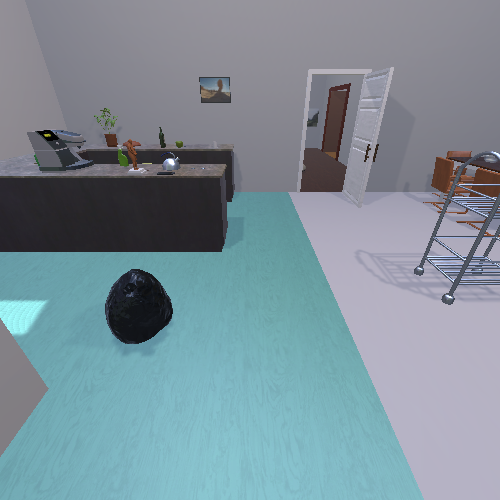

In [7]:
Image.fromarray(controller.last_event.frame)

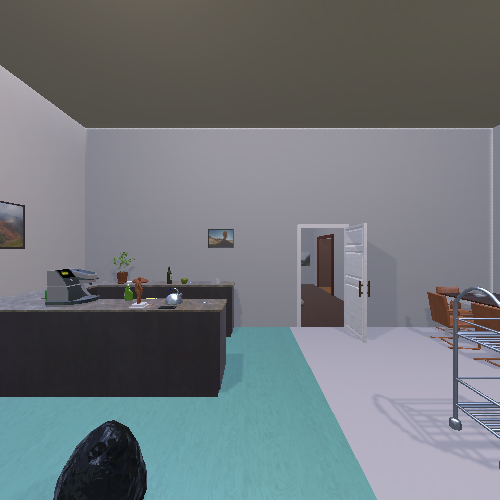

In [8]:
event = controller.step(action="LookUp")
Image.fromarray(event.frame)

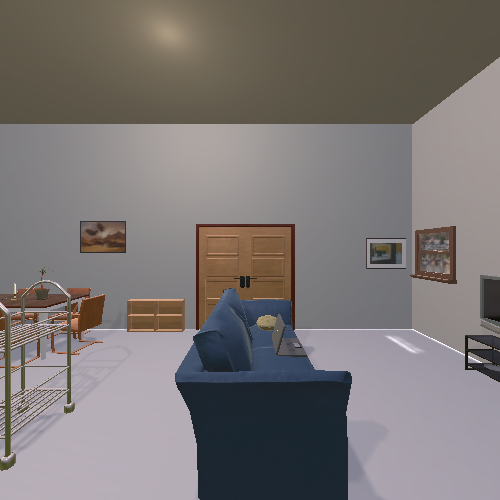

In [9]:
event = controller.step(action="RotateRight")
Image.fromarray(event.frame)

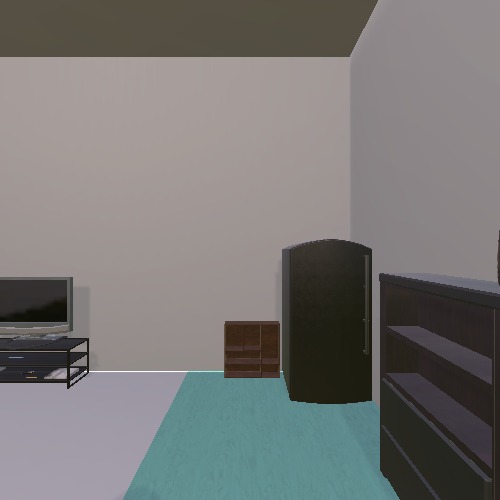

In [10]:
event = controller.step(action="RotateRight")
Image.fromarray(event.frame)

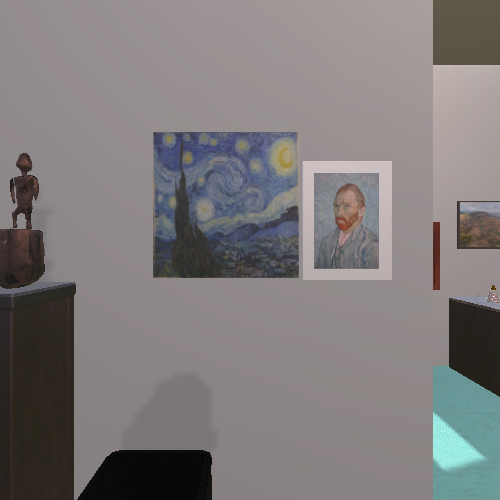

In [11]:
event = controller.step(action="RotateRight")
Image.fromarray(event.frame)

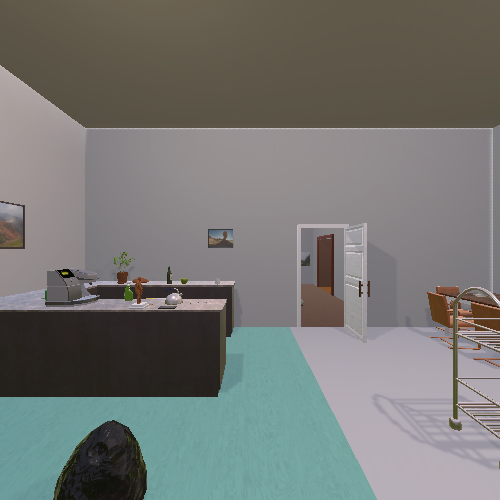

In [12]:
event = controller.step(action="RotateRight")
Image.fromarray(event.frame)

### Visualize top-down map

In [13]:
def get_top_down_frame():
    # Setup the top-down camera
    event = controller.step(action="GetMapViewCameraProperties", raise_for_failure=True)
    pose = copy.deepcopy(event.metadata["actionReturn"])

    bounds = event.metadata["sceneBounds"]["size"]
    max_bound = max(bounds["x"], bounds["z"])

    pose["fieldOfView"] = 50
    pose["position"]["y"] += 1.1 * max_bound
    pose["orthographic"] = False
    pose["farClippingPlane"] = 50
    del pose["orthographicSize"]

    # add the camera to the scene
    event = controller.step(
        action="AddThirdPartyCamera",
        **pose,
        skyboxColor="white",
        raise_for_failure=True,
    )
    top_down_frame = event.third_party_camera_frames[-1]
    return Image.fromarray(top_down_frame)

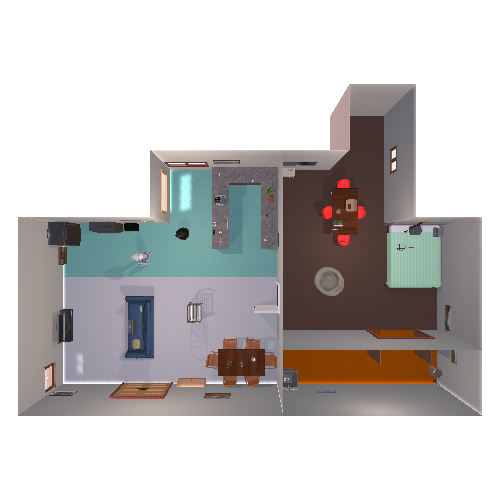

In [14]:
get_top_down_frame()

### Get all reachable positions

In [15]:
event = controller.step(action="GetReachablePositions")
event.metadata["actionReturn"]

[{'x': 3.25, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 3.5, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 3.25, 'y': 0.9009997844696045, 'z': 5.25},
 {'x': 3.0, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 3.25, 'y': 0.9009997844696045, 'z': 4.75},
 {'x': 3.75, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 3.5, 'y': 0.9009997844696045, 'z': 5.25},
 {'x': 3.5, 'y': 0.9009997844696045, 'z': 4.75},
 {'x': 3.25, 'y': 0.9009997844696045, 'z': 5.5},
 {'x': 3.0, 'y': 0.9009997844696045, 'z': 5.25},
 {'x': 2.75, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 3.0, 'y': 0.9009997844696045, 'z': 4.75},
 {'x': 3.25, 'y': 0.9009997844696045, 'z': 4.5},
 {'x': 4.0, 'y': 0.9009997844696045, 'z': 5.0},
 {'x': 3.75, 'y': 0.9009997844696045, 'z': 5.25},
 {'x': 3.75, 'y': 0.9009997844696045, 'z': 4.75},
 {'x': 3.5, 'y': 0.9009997844696045, 'z': 5.5},
 {'x': 3.5, 'y': 0.9009997844696045, 'z': 4.5},
 {'x': 3.25, 'y': 0.9009997844696045, 'z': 5.75},
 {'x': 3.0, 'y': 0.9009997844696045, 'z': 5.5},
 {'x': 2.75, 'y': 0.9

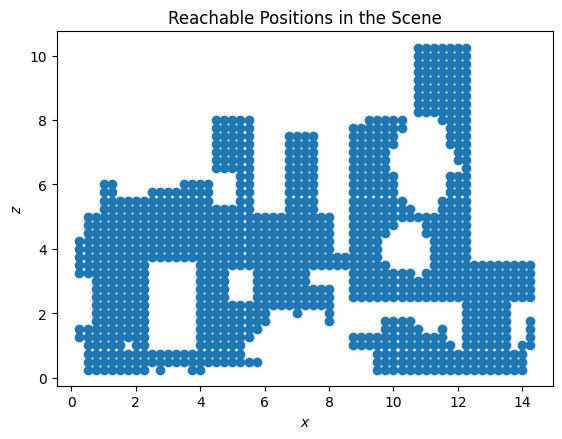

In [16]:
reachable_positions = event.metadata["actionReturn"]
xs = [rp["x"] for rp in reachable_positions]
zs = [rp["z"] for rp in reachable_positions]

fig, ax = plt.subplots(1, 1)
ax.scatter(xs, zs)
ax.set_xlabel("$x$")
ax.set_ylabel("$z$")
ax.set_title("Reachable Positions in the Scene")
ax.set_aspect("equal")

### Teleport agent to different positions in the environment

Teleporting the agent to {'x': 12.25, 'y': 0.9009997844696045, 'z': 4.75}  with rotation 215


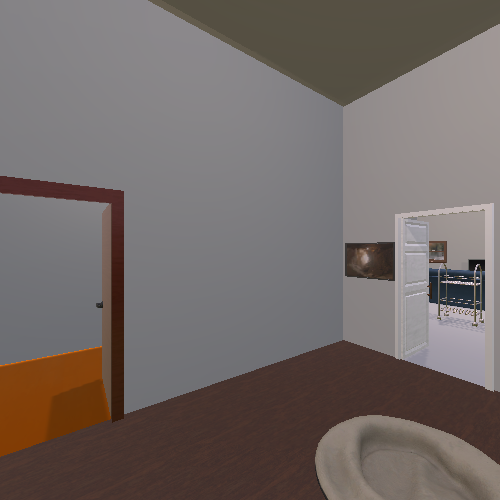

In [17]:
position = random.choice(reachable_positions)
rotation = random.choice(range(360))
print("Teleporting the agent to", position, " with rotation", rotation)

event = controller.step(action="Teleport", position=position, rotation=rotation)
Image.fromarray(event.frame)

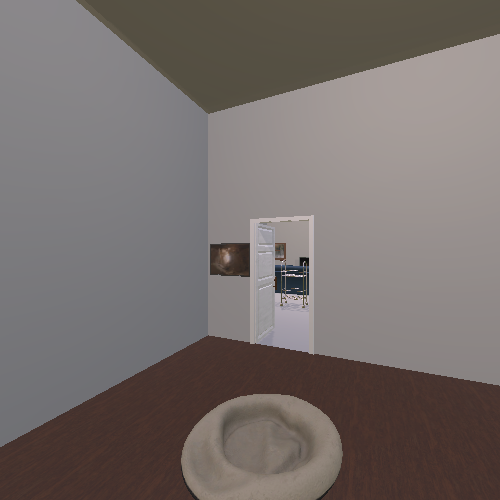

In [18]:
event = controller.step(action="Teleport", position=position, rotation=rotation + 30)
Image.fromarray(event.frame)

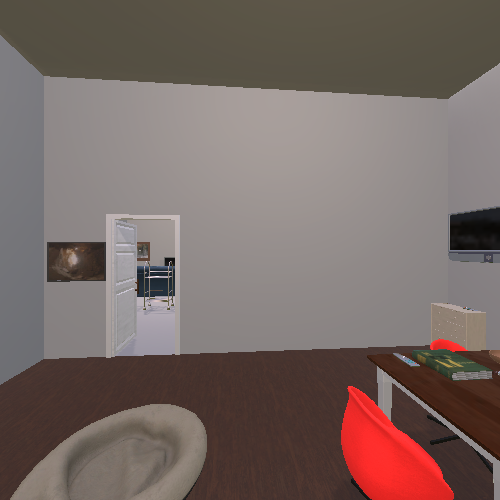

In [19]:
event = controller.step(action="Teleport", position=position, rotation=rotation + 60)
Image.fromarray(event.frame)

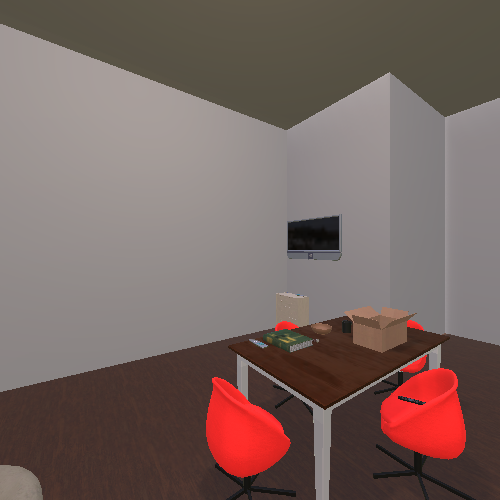

In [20]:
event = controller.step(action="Teleport", position=position, rotation=rotation + 90)
Image.fromarray(event.frame)

### Switch house

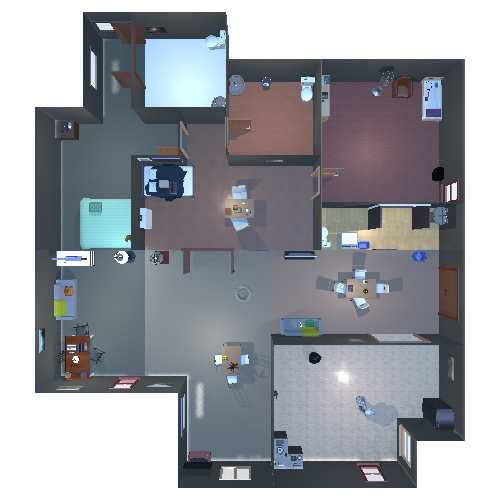

In [21]:
new_house = dataset["train"][1]
controller.reset(scene=new_house)

get_top_down_frame()